In [1]:
import logging

import helpers
import pandas as pd

In [2]:
handler = logging.StreamHandler()
handler.setLevel("DEBUG")
handler.setFormatter(logging.Formatter("%(levelname)s:%(name)s:%(message)s"))
logging.getLogger().addHandler(handler)

In [3]:
logging.getLogger("gcsfs").setLevel("INFO")
logging.getLogger("google.cloud.bigquery").setLevel("DEBUG")
logging.getLogger("helpers").setLevel("DEBUG")
logging.getLogger("helpers.creating_mixtures").setLevel("INFO")
logging.getLogger("pandas").setLevel("DEBUG")
logging.getLogger("pyarrow").setLevel("DEBUG")

# load my results using hg19 tpm

In [4]:
!gsutil ls -lRh gs://liulab/tmp/csx_results

gs://liulab/tmp/csx_results/:

gs://liulab/tmp/csx_results/in/:
151.35 MiB  2022-06-21T00:40:27Z  gs://liulab/tmp/csx_results/in/mymixture.txt
1023.52 MiB  2022-06-21T00:40:36Z  gs://liulab/tmp/csx_results/in/myrefsample.txt

gs://liulab/tmp/csx_results/out/:
125.73 KiB  2022-06-21T00:40:37Z  gs://liulab/tmp/csx_results/out/CIBERSORTx_Adjusted.txt
 19.71 MiB  2022-06-21T00:40:37Z  gs://liulab/tmp/csx_results/out/CIBERSORTx_Mixtures_Adjusted.txt
  4.27 MiB  2022-06-21T00:40:37Z  gs://liulab/tmp/csx_results/out/CIBERSORTx_cell_type_sourceGEP.txt
161.42 KiB  2022-06-21T00:40:38Z  gs://liulab/tmp/csx_results/out/CIBERSORTx_myrefsample_inferred_phenoclasses.CIBERSORTx_myrefsample_inferred_refsample.bm.K999.pdf
508.36 KiB  2022-06-21T00:40:38Z  gs://liulab/tmp/csx_results/out/CIBERSORTx_myrefsample_inferred_phenoclasses.CIBERSORTx_myrefsample_inferred_refsample.bm.K999.txt
     866 B  2022-06-21T00:40:38Z  gs://liulab/tmp/csx_results/out/CIBERSORTx_myrefsample_inferred_phenoclasses.txt
 20.7

In [5]:
uri_fractions_hg19_tpm = "gs://liulab/tmp/csx_results/out/CIBERSORTx_Adjusted.txt"

df_fractions_hg19_tpm = (
    pd.read_csv(uri_fractions_hg19_tpm, sep="\t")
    .iloc[:, :-3]
    .rename(columns={"Mixture": "tcga_aliquot_barcode"})
    # .set_index("Mixture")
    # .rename_axis(index="tcga_aliquot_barcode")
)
df_fractions_hg19_tpm["tcga_sample_barcode"] = (
    df_fractions_hg19_tpm["tcga_aliquot_barcode"]
    .str.split("-")
    .apply(lambda x: "-".join(x[:4]))
)

In [6]:
df_fractions_hg19_tpm

,tcga_aliquot_barcode,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8,tcga_sample_barcode
0,TCGA-3N-A9WB-06A-11R-A38C-07,0.000000,0.021370,0.004111,0.002587,0.968478,0.000123,0.001436,0.001896,0.000000,TCGA-3N-A9WB-06A
1,TCGA-3N-A9WC-06A-11R-A38C-07,0.027041,0.037598,0.014407,0.123255,0.715640,0.000000,0.000000,0.038068,0.043990,TCGA-3N-A9WC-06A
2,TCGA-3N-A9WD-06A-11R-A38C-07,0.025401,0.078062,0.047545,0.047625,0.740068,0.002113,0.000000,0.057487,0.001698,TCGA-3N-A9WD-06A
3,TCGA-BF-A1PU-01A-11R-A18S-07,0.000000,0.045057,0.025126,0.000542,0.925566,0.000250,0.001696,0.001762,0.000000,TCGA-BF-A1PU-01A
4,TCGA-BF-A1PV-01A-11R-A18U-07,0.000000,0.029165,0.002702,0.005665,0.956431,0.000485,0.002077,0.003476,0.000000,TCGA-BF-A1PV-01A
...,...,...,...,...,...,...,...,...,...,...,...
468,TCGA-YG-AA3O-06A-11R-A38C-07,0.000909,0.055892,0.001967,0.040643,0.887159,0.000000,0.006695,0.006735,0.000000,TCGA-YG-AA3O-06A
469,TCGA-YG-AA3P-06A-11R-A38C-07,0.000000,0.001028,0.001220,0.014827,0.974637,0.000409,0.003376,0.004503,0.000000,TCGA-YG-AA3P-06A
470,TCGA-Z2-A8RT-06A-11R-A37K-07,0.011749,0.028339,0.010795,0.063049,0.855967,0.000000,0.000000,0.027582,0.002519,TCGA-Z2-A8RT-06A
471,TCGA-Z2-AA3S-06A-11R-A39D-07,0.006269,0.000000,0.003533,0.027104,0.956478,0.000000,0.000000,0.006616,0.000000,TCGA-Z2-AA3S-06A


# load derek's results

In [7]:
df_fractions_derek = helpers.datasets.load_tcga_skcm_fractions_from_csx()

DEBUG:helpers.datasets:loading TCGA SKCM fractions estimated by CIBERSORTx


In [64]:
x = df_fractions_derek.stack().rename(
    "Generated by Derek (I think: TPM for sc, counts for bulks)"
)
y = (
    df_fractions_hg19_tpm.set_index("tcga_aliquot_barcode")
    .drop(columns="tcga_sample_barcode")
    .stack()
    .rename("Generated by me (everything TPM)")
)

df_to_plot = (
    pd.concat([x, y], axis=1)
    .rename_axis(index=["aliquot_barcode", "cell_type"])
    .reset_index()
)

In [65]:
df_to_plot

,aliquot_barcode,cell_type,"Generated by Derek (I think: TPM for sc, counts for bulks)",Generated by me (everything TPM)
0,TCGA-3N-A9WB-06A-11R-A38C-07,B,0.000000,0.000000
1,TCGA-3N-A9WB-06A-11R-A38C-07,CAF,0.018483,0.021370
2,TCGA-3N-A9WB-06A-11R-A38C-07,Endothelial,0.004211,0.004111
3,TCGA-3N-A9WB-06A-11R-A38C-07,Macrophage,0.000000,0.002587
4,TCGA-3N-A9WB-06A-11R-A38C-07,Malignant,0.971059,0.968478
...,...,...,...,...
4252,TCGA-Z2-AA3V-06A-11R-A39D-07,Malignant,0.603332,0.649510
4253,TCGA-Z2-AA3V-06A-11R-A39D-07,NK,0.020841,0.023673
4254,TCGA-Z2-AA3V-06A-11R-A39D-07,T,0.000000,0.000000
4255,TCGA-Z2-AA3V-06A-11R-A39D-07,T CD4,0.133585,0.083490


# compare my results with derek's fractions

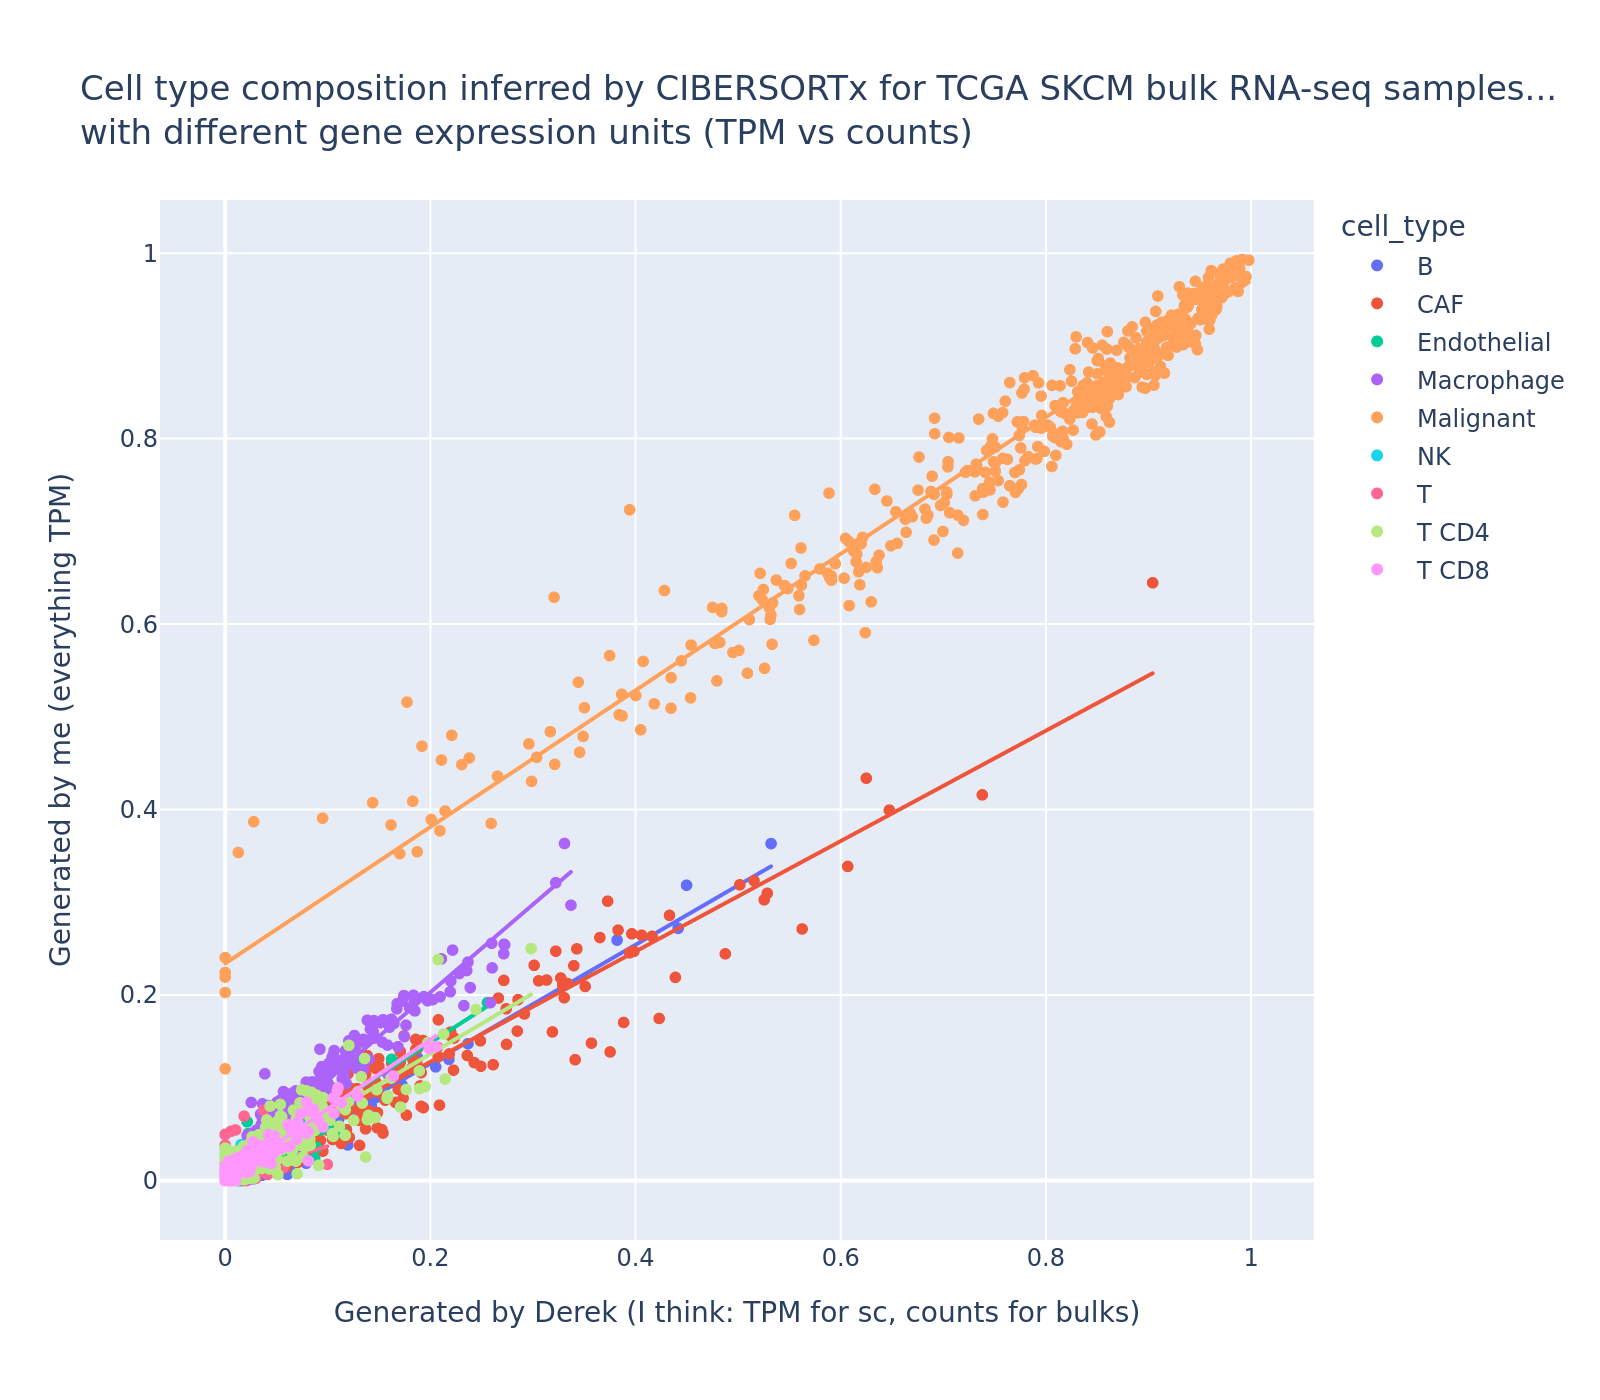

In [66]:
title = (
    "Cell type composition inferred by CIBERSORTx for TCGA SKCM bulk RNA-seq samples..."
    "<br>with different gene expression units (TPM vs counts)"
)

fig = px.scatter(
    df_to_plot,
    x=df_to_plot.columns[2],
    y=df_to_plot.columns[3],
    color=df_to_plot.columns[1],
    trendline="ols",
    title=title,
)

fig.show(renderer="png", height=700, width=800, scale=2)

# how correlated is `Malignant` with TCGA `avg_percent_tumor_cells`?

In [9]:
from google.cloud import bigquery

In [10]:
bqclient = bigquery.Client()

query_string = """
SELECT * 
FROM `isb-cgc-bq.TCGA.biospecimen_gdc_current`
where project_short_name = "TCGA-SKCM"
order by sample_barcode
"""

df_tcga_sample_metadata = (
    bqclient.query(query_string).result().to_dataframe(progress_bar_type="tqdm")
)

Downloading: 100%|██████████| 948/948 [00:01<00:00, 709.53rows/s]


In [11]:
df_tcga_sample_metadata

,sample_barcode,sample_gdc_id,case_barcode,case_gdc_id,sample_type,sample_type_name,program_name,project_short_name,batch_number,bcr,...,max_percent_tumor_cells,max_percent_tumor_nuclei,min_percent_lymphocyte_infiltration,min_percent_monocyte_infiltration,min_percent_necrosis,min_percent_neutrophil_infiltration,min_percent_normal_cells,min_percent_stromal_cells,min_percent_tumor_cells,min_percent_tumor_nuclei
0,TCGA-3N-A9WB-06A,5b0c4070-1e90-4562-85e3-96dd34444e29,TCGA-3N-A9WB,5564e6a7-2195-4b0d-994e-b0617b58e889,06,Metastatic,TCGA,TCGA-SKCM,393,Nationwide Children's Hospital,...,80.0,80.0,3.0,1.0,0.0,2.0,3.0,17.0,80.0,80.0
1,TCGA-3N-A9WB-10A,2aad1db1-196a-4699-a5a3-24f8214d8b7d,TCGA-3N-A9WB,5564e6a7-2195-4b0d-994e-b0617b58e889,10,Blood Derived Normal,TCGA,TCGA-SKCM,393,Nationwide Children's Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-3N-A9WC-06A,788ffdc2-b4e0-4318-abb9-fd6d8a0e6a66,TCGA-3N-A9WC,551e071a-c290-4b48-9000-f64c2a44dfb7,06,Metastatic,TCGA,TCGA-SKCM,393,Nationwide Children's Hospital,...,80.0,80.0,3.0,1.0,0.0,2.0,0.0,20.0,80.0,80.0
3,TCGA-3N-A9WC-10A,14917dcf-32ca-49ca-8807-53bda3d68448,TCGA-3N-A9WC,551e071a-c290-4b48-9000-f64c2a44dfb7,10,Blood Derived Normal,TCGA,TCGA-SKCM,393,Nationwide Children's Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-3N-A9WD-06A,e8ff0d68-1e98-4490-be82-5c6d51559a6c,TCGA-3N-A9WD,a29a20e3-5c2c-4f37-b93e-ae9ebc46ec53,06,Metastatic,TCGA,TCGA-SKCM,393,Nationwide Children's Hospital,...,80.0,80.0,2.0,1.0,0.0,1.0,0.0,20.0,80.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,TCGA-Z2-A8RT-10A,84f26c92-dbc9-41db-81e6-f7581c888b00,TCGA-Z2-A8RT,590b5e18-d837-4c0e-becf-80520db57c0f,10,Blood Derived Normal,TCGA,TCGA-SKCM,388,Nationwide Children's Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
944,TCGA-Z2-AA3S-06A,70ba74d5-583e-46f7-b650-3560efaee4a8,TCGA-Z2-AA3S,71b347ac-6ac6-475d-8e21-754764180948,06,Metastatic,TCGA,TCGA-SKCM,408,Nationwide Children's Hospital,...,80.0,80.0,3.0,0.0,0.0,0.0,0.0,20.0,80.0,80.0
945,TCGA-Z2-AA3S-10A,9fbb3509-d9da-4783-a3bf-1a86191c8dab,TCGA-Z2-AA3S,71b347ac-6ac6-475d-8e21-754764180948,10,Blood Derived Normal,TCGA,TCGA-SKCM,408,Nationwide Children's Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
946,TCGA-Z2-AA3V-06A,19ba4651-0627-4571-aef5-5cb0fb173196,TCGA-Z2-AA3V,5b10234b-6189-449f-8886-d0d44a729ced,06,Metastatic,TCGA,TCGA-SKCM,408,Nationwide Children's Hospital,...,70.0,70.0,10.0,5.0,0.0,0.0,0.0,30.0,70.0,70.0


In [12]:
df_tcga_sample_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   sample_barcode                       948 non-null    object 
 1   sample_gdc_id                        946 non-null    object 
 2   case_barcode                         948 non-null    object 
 3   case_gdc_id                          946 non-null    object 
 4   sample_type                          948 non-null    object 
 5   sample_type_name                     948 non-null    object 
 6   program_name                         948 non-null    object 
 7   project_short_name                   948 non-null    object 
 8   batch_number                         948 non-null    Int64  
 9   bcr                                  948 non-null    object 
 10  days_to_collection                   926 non-null    float64
 11  days_to_sample_procurement      

In [13]:
pd.merge(
    df_fractions_hg19_tpm[["tcga_sample_barcode", "Malignant"]],
    df_tcga_sample_metadata[["sample_barcode", "avg_percent_tumor_cells"]],
    left_on="tcga_sample_barcode",
    right_on="sample_barcode",
    how="inner",
)

,tcga_sample_barcode,Malignant,sample_barcode,avg_percent_tumor_cells
0,TCGA-3N-A9WB-06A,0.968478,TCGA-3N-A9WB-06A,80.0
1,TCGA-3N-A9WC-06A,0.715640,TCGA-3N-A9WC-06A,80.0
2,TCGA-3N-A9WD-06A,0.740068,TCGA-3N-A9WD-06A,80.0
3,TCGA-BF-A1PU-01A,0.925566,TCGA-BF-A1PU-01A,65.0
4,TCGA-BF-A1PV-01A,0.956431,TCGA-BF-A1PV-01A,95.0
...,...,...,...,...
468,TCGA-YG-AA3O-06A,0.887159,TCGA-YG-AA3O-06A,90.0
469,TCGA-YG-AA3P-06A,0.974637,TCGA-YG-AA3P-06A,90.0
470,TCGA-Z2-A8RT-06A,0.855967,TCGA-Z2-A8RT-06A,90.0
471,TCGA-Z2-AA3S-06A,0.956478,TCGA-Z2-AA3S-06A,80.0


In [14]:
df_to_plot = (
    df_fractions_hg19_tpm.set_index("tcga_sample_barcode")
    .join(
        df_tcga_sample_metadata.set_index("sample_barcode")["avg_percent_tumor_cells"],
        how="inner",
    )[["Malignant", "avg_percent_tumor_cells"]]
    .rename(
        columns={
            "Malignant": "Inferred by CIBERSORTx",
            "avg_percent_tumor_cells": "According to TCGA metadata",
        }
    )
)

In [15]:
df_to_plot

,Inferred by CIBERSORTx,According to TCGA metadata
TCGA-3N-A9WB-06A,0.968478,80.0
TCGA-3N-A9WC-06A,0.715640,80.0
TCGA-3N-A9WD-06A,0.740068,80.0
TCGA-BF-A1PU-01A,0.925566,65.0
TCGA-BF-A1PV-01A,0.956431,95.0
...,...,...
TCGA-YG-AA3O-06A,0.887159,90.0
TCGA-YG-AA3P-06A,0.974637,90.0
TCGA-Z2-A8RT-06A,0.855967,90.0
TCGA-Z2-AA3S-06A,0.956478,80.0


In [16]:
df_to_plot.corr()

,Inferred by CIBERSORTx,According to TCGA metadata
Inferred by CIBERSORTx,1.000000,0.103579
According to TCGA metadata,0.103579,1.000000


In [17]:
import plotly.express as px
import plotly.graph_objects as go

In [18]:
fig = (
    px.scatter(
        df_to_plot,
        x="According to TCGA metadata",
        y="Inferred by CIBERSORTx",
        trendline="ols",
        title="Malignant cell composition of TCGA SKCM samples<br>... comparing CIBERSORTx with TCGA metadata",
    )
    .update_yaxes(range=(0, 1))
    .update_xaxes(range=(0, 100))
)

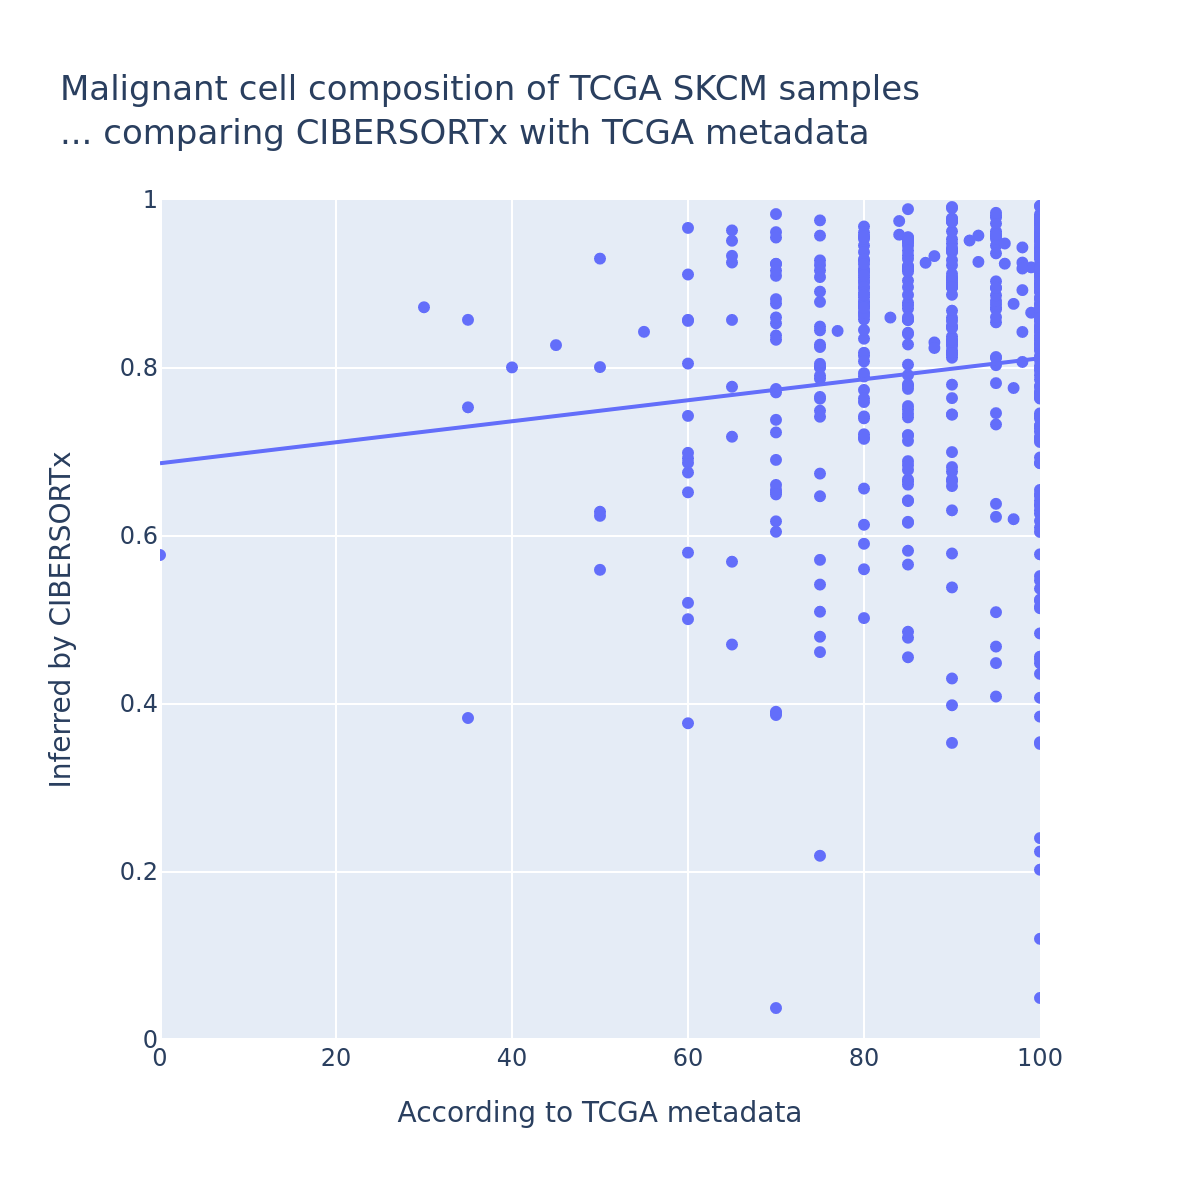

In [19]:
fig.show(renderer="png", width=600, height=600, scale=2)

# compare with the fractions Derek generated